In [40]:
print('ACIT 4610, Portfolio-2024')
print('\nGroup-13')
print('\nparticipate: Harith Elamin', 'Thomas Nygaard')

ACIT 4610, Portfolio-2024

Group-13

participate: Harith Elamin Thomas Nygaard


In [26]:
print('Tools and Libraries:')
print('\n1- Python 3.')
print('\n2- OpenAI Gym for the environment.')
print('\n3- Deep to use Genetic Programming, implement an evolutionary algorithms.')
print('\n4- NumPy for numerical computations.')
print('\n5- pandas for data manipulation and analysis.')
print('\n6- requests for the process of sending and receiving data from websites.')
print('\n7- Matplotlib for plotting results.')
print('\n8- TensorFlow/PyTorch for more advanced RL algorithms like DQN.')
print('\n9- pymoo for for multi-objective optimization algorithms.')
print('\n10-Keras for the convenience of mathematical calculations')

!pip3 freeze
!pip3 install gym pygame numpy tensorflow keras openAi matplotlib requests pandas gym deap pymoo


import sys
print('System version',sys.version)

Tools and Libraries:

1- Python 3.

2- OpenAI Gym for the environment.

3- Deep to use Genetic Programming, implement an evolutionary algorithms.

4- NumPy for numerical computations.

5- pandas for data manipulation and analysis.

6- requests for the process of sending and receiving data from websites.

7- Matplotlib for plotting results.

8- TensorFlow/PyTorch for more advanced RL algorithms like DQN.

9- pymoo for for multi-objective optimization algorithms.

10-Keras for the convenience of mathematical calculations
about-time==4.2.1
alive-progress==3.1.5
asttokens==2.4.1
autograd==1.7.0
beautifulsoup4==4.12.3
certifi==2024.8.30
charset-normalizer==3.4.0
cloudpickle==3.1.0
cma==3.2.2
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
deap==1.4.1
debugpy==1.8.7
decorator==5.1.1
Deprecated==1.2.14
dill==0.3.9
executing==2.1.0
Farama-Notifications==0.0.4
fonttools==4.54.1
frozendict==2.4.6
grapheme==0.6.0
gym==0.26.2
gym-notices==0.0.8
gymnasium==1.0.0
html5lib==1.1
idna==3.10

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


Problem 4: Solving a Real-World Problem Using Reinforcement Learning

Overview 
This lab exercise aims to apply reinforcement learning techniques to solve a real-world 
problem. Students will use a publicly available dataset to train an RL agent, evaluate its 
performance, and optimize it to achieve the best possible outcome. 

Problem Statement: 
Autonomous Taxi Navigation 
You will develop an autonomous taxi driver who picks up passengers and drops them off at 
their destinations in the shortest possible time. The environment is a grid-based city, and the 
taxi must navigate to specific locations while avoiding obstacles, optimizing routes, and 
maximizing the efficiency of passenger pickups and drop-offs. 

Dataset: 
In order to utilize the Taxi-v3 environment available in the OpenAI Gym we have to interact with Taxi-v3 Environment.

In [ ]:
import gym

# Taxi environment
env = gym.make('Taxi-v3')


Tasks: 
1. Understanding the Environment:
A. Explore the Taxi-v3 environment.
B. Understand the state space, action space, and reward system. 
C. Visualize the grid and how the taxi moves within it.

In [ ]:
import gymnasium as gym

# Create the Taxi environment
env = gym.make('Taxi-v3')

# Reset the environment to start a new episode
state, info = env.reset()  # Reset now returns (state, info)

# Render the initial state of the environment
print("Initial State:")
env.render()

# Interact with the environment by taking random actions
done = False
total_reward = 0

while not done:
    # Take a random action
    action = env.action_space.sample()  # Random action
    next_state, reward, done, truncated, info = env.step(action)  # Step returns a 5-tuple

    # Accumulate the reward
    total_reward += reward

    # Print out the current step information
    print(f"Action: {action}, Reward: {reward}, Next State: {next_state}")
    env.render()  # Render the environment to see the new state

# Print the total reward after the episode ends
print(f"Total reward: {total_reward}")


Initial State:
Action: 5, Reward: -10, Next State: 313
Action: 2, Reward: -1, Next State: 313
Action: 3, Reward: -1, Next State: 313
Action: 0, Reward: -1, Next State: 413
Action: 4, Reward: -10, Next State: 413
Action: 3, Reward: -1, Next State: 413
Action: 4, Reward: -10, Next State: 413
Action: 3, Reward: -1, Next State: 413
Action: 4, Reward: -10, Next State: 413
Action: 3, Reward: -1, Next State: 413
Action: 3, Reward: -1, Next State: 413
Action: 3, Reward: -1, Next State: 413
Action: 4, Reward: -10, Next State: 413
Action: 0, Reward: -1, Next State: 413
Action: 4, Reward: -10, Next State: 413
Action: 3, Reward: -1, Next State: 413
Action: 5, Reward: -10, Next State: 413
Action: 5, Reward: -10, Next State: 413
Action: 4, Reward: -10, Next State: 413
Action: 4, Reward: -10, Next State: 413
Action: 1, Reward: -1, Next State: 313
Action: 4, Reward: -10, Next State: 313
Action: 5, Reward: -10, Next State: 313
Action: 1, Reward: -1, Next State: 213
Action: 0, Reward: -1, Next State: 31

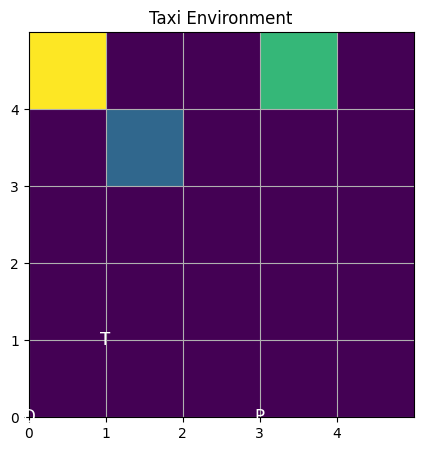

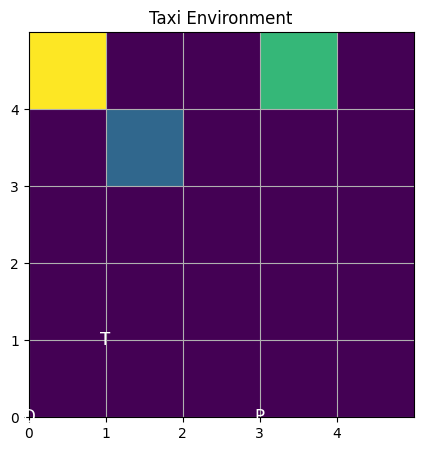

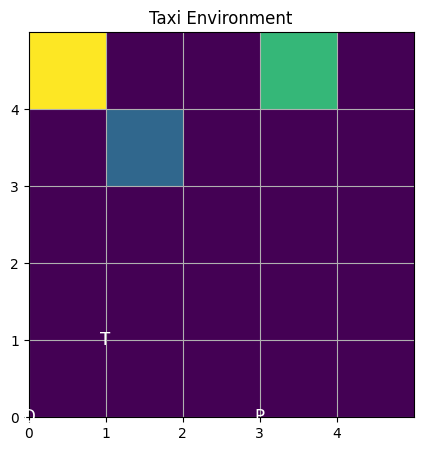

Total reward after 3 moves: -12


In [35]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import time

# Create the Taxi environment
env = gym.make('Taxi-v3')

# Function to decode the state from integer representation
def decode_state(state):
    # The Taxi environment is a 5x5 grid, with 4 possible locations for passengers (0-4)
    # and 4 possible locations for the destination (0-4).
    # Total state space: 5x5x5x5x4 = 500 states.

    grid_size = 5
    passenger_positions = 4
    destination_positions = 4

    # Decode the state (state is a single integer)
    taxi_pos = state % (grid_size * grid_size)  # Taxi's position (0-24)
    passenger_idx = (state // (grid_size * grid_size)) % passenger_positions  # Passenger's location (0-4)
    destination_idx = (state // (grid_size * grid_size * passenger_positions)) % destination_positions  # Destination's location (0-4)
    
    taxi_row, taxi_col = divmod(taxi_pos, grid_size)  # Taxi's row and column
    passenger_pos = passenger_idx  # Passenger's position (integer representation)
    destination_pos = destination_idx  # Destination's position (integer representation)

    return taxi_row, taxi_col, passenger_pos, destination_pos

# Function to render the environment as a plot
def render_grid(state):
    grid_size = 5
    taxi_row, taxi_col, passenger_pos, destination_pos = decode_state(state)
    
    # Create a 5x5 grid
    grid = np.zeros((grid_size, grid_size))

    # Mark taxi, passenger, and destination positions
    grid[taxi_row, taxi_col] = 1  # Taxi's position (1)
    grid[passenger_pos // grid_size, passenger_pos % grid_size] = 2  # Passenger's position (2)
    grid[destination_pos // grid_size, destination_pos % grid_size] = 3  # Destination's position (3)

    # Create the plot
    plt.figure(figsize=(5, 5))
    plt.imshow(grid, cmap="viridis", origin="upper", extent=(0, grid_size, 0, grid_size))
    
    # Grid labels and settings
    plt.grid(True)
    plt.xticks(range(5))
    plt.yticks(range(5))

    # Add text labels for taxi (T), passenger (P), and destination (D)
    plt.text(taxi_col, taxi_row, "T", ha='center', va='center', fontsize=12, color='white')
    plt.text(passenger_pos % grid_size, passenger_pos // grid_size, "P", ha='center', va='center', fontsize=12, color='white')
    plt.text(destination_pos % grid_size, destination_pos // grid_size, "D", ha='center', va='center', fontsize=12, color='white')

    plt.title("Taxi Environment")
    plt.show()

# Reset the environment and start an episode
state, info = env.reset()  # This will return state as an integer and info as a dictionary
done = False
total_reward = 0
moves = 0  # To keep track of the number of moves

# Interact with the environment by taking random actions
while not done and moves < 3:  # Limit to 3 moves
    # Render the environment
    render_grid(state)
    
    # Take a random action
    action = env.action_space.sample()  # Random action
    next_state, reward, done, truncated, info = env.step(action)  # Step the environment
    
    # Accumulate reward
    total_reward += reward
    
    # Update the state
    state = next_state

    # Increment move counter
    moves += 1

    # Pause to create animation effect
    time.sleep(1)

# Print the total reward after the episode ends
print(f"Total reward after {moves} moves: {total_reward}")


2. Setting Up the RL Agent: 

In [36]:
import gymnasium as gym
import numpy as np
import random
import time

# Create the Taxi environment
env = gym.make('Taxi-v3')

# Initialize the Q-table with zeros: (state_space, action_space)
state_space = env.observation_space.n  # Total number of states (500 for Taxi-v3)
action_space = env.action_space.n  # Total number of actions (6 for Taxi-v3)
Q = np.zeros((state_space, action_space))

# Hyperparameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate (epsilon-greedy)
episodes = 1000  # Number of episodes to train the agent
max_steps_per_episode = 100  # Max steps per episode

# Epsilon-greedy action selection
def epsilon_greedy(state):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore: take random action
    else:
        return np.argmax(Q[state])  # Exploit: take action with highest Q-value

# Train the agent
for episode in range(episodes):
    state, info = env.reset()  # Reset the environment and get the initial state
    done = False
    total_reward = 0
    
    for step in range(max_steps_per_episode):
        action = epsilon_greedy(state)  # Select action based on epsilon-greedy policy
        next_state, reward, done, truncated, info = env.step(action)  # Take action
        
        # Update Q-value using the Q-learning formula
        best_next_action = np.argmax(Q[next_state])  # Max Q-value for next state
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])
        
        total_reward += reward
        state = next_state  # Move to the next state
        
        if done:  # If the episode is done
            break
    
    # Print the total reward at the end of each episode
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

# Test the learned policy (after training)
state, info = env.reset()
done = False
total_reward = 0

print("Testing learned policy:")
while not done:
    action = np.argmax(Q[state])  # Choose the best action based on learned Q-table
    next_state, reward, done, truncated, info = env.step(action)
    total_reward += reward
    state = next_state
    env.render()  # Optionally render the environment to visualize the steps

print(f"Total reward after training: {total_reward}")


Episode 100/1000, Total Reward: -118
Episode 200/1000, Total Reward: -145
Episode 300/1000, Total Reward: -121
Episode 400/1000, Total Reward: -112
Episode 500/1000, Total Reward: -50
Episode 600/1000, Total Reward: -139
Episode 700/1000, Total Reward: -12
Episode 800/1000, Total Reward: 5
Episode 900/1000, Total Reward: -208
Episode 1000/1000, Total Reward: -12
Testing learned policy:
Total reward after training: 12


In [41]:
import gymnasium as gym
import numpy as np
import random

# Create the Taxi environment
env = gym.make('Taxi-v3')

# Initialize the Q-table with zeros: (state_space, action_space)
state_space = env.observation_space.n  # Number of possible states (500)
action_space = env.action_space.n  # Number of possible actions (6)
Q = np.zeros((state_space, action_space))  # Initialize the Q-table

# Hyperparameters for Q-learning
alpha = 0.1  # Learning rate (how much new information overrides the old)
gamma = 0.99  # Discount factor (how much we care about future rewards)
epsilon = 0.1  # Exploration rate (probability of exploring instead of exploiting)
episodes = 1000  # Number of episodes to train the agent
max_steps_per_episode = 100  # Max steps per episode

# Epsilon-greedy action selection function
def epsilon_greedy(state):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore: take a random action
    else:
        return np.argmax(Q[state])  # Exploit: take action with highest Q-value

# Train the agent
for episode in range(episodes):
    state, info = env.reset()  # Reset the environment at the start of each episode
    done = False
    total_reward = 0
    
    for step in range(max_steps_per_episode):
        # Select an action based on epsilon-greedy policy
        action = epsilon_greedy(state)
        
        # Take the action and observe the reward and next state
        next_state, reward, done, truncated, info = env.step(action)
        
        # Q-value update using the Q-learning formula
        best_next_action = np.argmax(Q[next_state])  # Max Q-value for next state
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])
        
        total_reward += reward
        state = next_state  # Update the state to the next state
        
        if done:  # If the episode is done, break out of the loop
            break
    
    # Optionally, print the total reward for every 100th episode
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

# Optionally: Testing phase (after training)
state, info = env.reset()
done = False
total_reward = 0

print("Testing learned policy:")
while not done:
    action = np.argmax(Q[state])  # Exploit the learned policy (choose the action with the highest Q-value)
    next_state, reward, done, truncated, info = env.step(action)
    total_reward += reward
    state = next_state
    env.render()  # Optionally render the environment to visualize the steps

print(f"Total reward after training: {total_reward}")


Episode 100/1000, Total Reward: -127
Episode 200/1000, Total Reward: -118
Episode 300/1000, Total Reward: -154
Episode 400/1000, Total Reward: -118
Episode 500/1000, Total Reward: -115
Episode 600/1000, Total Reward: -127
Episode 700/1000, Total Reward: 11
Episode 800/1000, Total Reward: -60
Episode 900/1000, Total Reward: -107
Episode 1000/1000, Total Reward: 13
Testing learned policy:
Total reward after training: 10


Training the RL Agent:

A. Train the RL agent on the Taxi-v3 environment.

In [38]:
import gymnasium as gym
import numpy as np
import random

# Create the Taxi environment
env = gym.make('Taxi-v3')

# Initialize the Q-table with zeros: (state_space, action_space)
state_space = env.observation_space.n  # Number of possible states (500)
action_space = env.action_space.n  # Number of possible actions (6)
Q = np.zeros((state_space, action_space))  # Initialize the Q-table

# Hyperparameters for Q-learning
alpha = 0.1  # Learning rate (how much new information overrides the old)
gamma = 0.99  # Discount factor (how much we care about future rewards)
epsilon = 0.1  # Exploration rate (probability of exploring instead of exploiting)
episodes = 1000  # Number of episodes to train the agent
max_steps_per_episode = 100  # Max steps per episode

# Epsilon-greedy action selection function
def epsilon_greedy(state):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore: take a random action
    else:
        return np.argmax(Q[state])  # Exploit: take action with highest Q-value

# Training the agent
for episode in range(episodes):
    state, info = env.reset()  # Reset the environment at the start of each episode
    done = False
    total_reward = 0
    
    for step in range(max_steps_per_episode):
        # Select an action based on epsilon-greedy policy
        action = epsilon_greedy(state)
        
        # Take the action and observe the reward and next state
        next_state, reward, done, truncated, info = env.step(action)
        
        # Q-value update using the Q-learning formula
        best_next_action = np.argmax(Q[next_state])  # Max Q-value for next state
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])
        
        total_reward += reward
        state = next_state  # Update the state to the next state
        
        if done:  # If the episode is done, break out of the loop
            break
    
    # Optionally, print the total reward for every 100th episode
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

# Optionally: Testing phase (after training)
state, info = env.reset()
done = False
total_reward = 0

print("Testing learned policy:")
while not done:
    action = np.argmax(Q[state])  # Exploit the learned policy (choose the action with the highest Q-value)
    next_state, reward, done, truncated, info = env.step(action)
    total_reward += reward
    state = next_state
    env.render()  # Optionally render the environment to visualize the steps

print(f"Total reward after training: {total_reward}")


Episode 100/1000, Total Reward: -118
Episode 200/1000, Total Reward: -84
Episode 300/1000, Total Reward: -127
Episode 400/1000, Total Reward: -154
Episode 500/1000, Total Reward: -127
Episode 600/1000, Total Reward: -136
Episode 700/1000, Total Reward: -154
Episode 800/1000, Total Reward: -136
Episode 900/1000, Total Reward: -3
Episode 1000/1000, Total Reward: -53
Testing learned policy:
Total reward after training: 11


B. Tune hyperparameters such as learning rate, discount factor, and exploration 
strategy (ε-greedy). 

Q-learning with Tuned Hyperparameters

In [54]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Create the Taxi environment
env = gym.make('Taxi-v3')

# Hyperparameters for Q-learning (These values will be tuned)
alphas = [0.1, 0.2, 0.3]  # Learning rates to test
gammas = [0.9, 0.95, 0.99]  # Discount factors to test
epsilons = [0.1, 0.2, 0.3]  # Exploration rates to test
episodes = 1000  # Number of episodes to train the agent
max_steps_per_episode = 100  # Max steps per episode

# Function to train the agent with specific hyperparameters
def train_agent(alpha, gamma, epsilon):
    state_space = env.observation_space.n  # Number of possible states (500)
    action_space = env.action_space.n  # Number of possible actions (6)
    Q = np.zeros((state_space, action_space))  # Initialize the Q-table

    # Epsilon-greedy action selection function
    def epsilon_greedy(state):
        if random.uniform(0, 1) < epsilon:
            return env.action_space.sample()  # Explore: take a random action
        else:
            return np.argmax(Q[state])  # Exploit: take action with highest Q-value
    
    # Training loop
    total_rewards = []  # To track rewards across episodes
    for episode in range(episodes):
        state, info = env.reset()  # Reset the environment at the start of each episode
        done = False
        total_reward = 0
        
        for step in range(max_steps_per_episode):
            # Select an action based on epsilon-greedy policy
            action = epsilon_greedy(state)
            
            # Take the action and observe the reward and next state
            next_state, reward, done, truncated, info = env.step(action)
            
            # Q-value update using the Q-learning formula
            best_next_action = np.argmax(Q[next_state])  # Max Q-value for next state
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])
            
            total_reward += reward
            state = next_state  # Update the state to the next state
            
            if done:  # If the episode is done, break out of the loop
                break
        
        total_rewards.append(total_reward)  # Track total reward for the episode

        # Optionally, print the total reward for every 100th episode
        if (episode + 1) % 100 == 0:
            print(f"Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}, Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

    # Return the total rewards for each episode for analysis
    return total_rewards

# Tune hyperparameters
# We will store the total rewards for different combinations


Evaluate the performance of the trained RL agent.

In [42]:
def evaluate_agent(alpha, gamma, epsilon, episodes=100):
    """
    Evaluates the trained Q-learning agent by running the agent with a greedy policy.
    
    Arguments:
    - alpha: learning rate (not used during evaluation)
    - gamma: discount factor (not used during evaluation)
    - epsilon: exploration rate (not used during evaluation)
    - episodes: number of episodes to evaluate
    
    Returns:
    - average_reward: average reward over all test episodes
    - steps_per_episode: list of steps per episode
    """
    state_space = env.observation_space.n  # Number of possible states (500)
    action_space = env.action_space.n  # Number of possible actions (6)
    Q = np.zeros((state_space, action_space))  # Initialize the Q-table

    # Re-train the agent for a single time to obtain the Q-table
    rewards = train_agent(alpha, gamma, epsilon)  # Use the learned Q-values
    
    # Set epsilon to 0 (no exploration) for evaluation
    epsilon = 0.0
    total_reward = 0
    steps_per_episode = []  # List to track the number of steps in each episode

    # Evaluate the agent on multiple test episodes
    for episode in range(episodes):
        state, info = env.reset()  # Reset the environment
        done = False
        episode_reward = 0
        steps = 0
        
        while not done:
            action = np.argmax(Q[state])  # Greedy action (exploit the learned policy)
            next_state, reward, done, truncated, info = env.step(action)
            episode_reward += reward
            steps += 1
            state = next_state  # Move to next state
        
        total_reward += episode_reward
        steps_per_episode.append(steps)
    
    # Calculate average reward per episode
    average_reward = total_reward / episodes
    
    return average_reward, steps_per_episode


In [55]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Create the Taxi environment
env = gym.make('Taxi-v3')

# Hyperparameters for Q-learning (These values will be tuned)
alphas = [0.1, 0.2, 0.3]  # Learning rates to test
gammas = [0.9, 0.95, 0.99]  # Discount factors to test
epsilons = [0.1, 0.2, 0.3]  # Exploration rates to test
episodes = 1000  # Number of episodes to train the agent
max_steps_per_episode = 100  # Max steps per episode

# Function to train the agent with specific hyperparameters
def train_agent(alpha, gamma, epsilon):
    state_space = env.observation_space.n  # Number of possible states (500)
    action_space = env.action_space.n  # Number of possible actions (6)
    Q = np.zeros((state_space, action_space))  # Initialize the Q-table

    # Epsilon-greedy action selection function
    def epsilon_greedy(state):
        if random.uniform(0, 1) < epsilon:
            return env.action_space.sample()  # Explore: take a random action
        else:
            return np.argmax(Q[state])  # Exploit: take action with highest Q-value
    
    # Training loop
    total_rewards = []  # To track rewards across episodes
    cumulative_rewards = []  # To track cumulative rewards over time
    total_reward = 0  # Initialize total reward for cumulative plot
    
    for episode in range(episodes):
        state, info = env.reset()  # Reset the environment at the start of each episode
        done = False
        episode_reward = 0
        
        for step in range(max_steps_per_episode):
            # Select an action based on epsilon-greedy policy
            action = epsilon_greedy(state)
            
            # Take the action and observe the reward and next state
            next_state, reward, done, truncated, info = env.step(action)
            
            # Q-value update using the Q-learning formula
            best_next_action = np.argmax(Q[next_state])  # Max Q-value for next state
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])
            
            episode_reward += reward
            state = next_state  # Update the state to the next state
            
            if done:  # If the episode is done, break out of the loop
                break
        
        total_rewards.append(episode_reward)  # Track total reward for the episode
        total_reward += episode_reward  # Update cumulative reward
        cumulative_rewards.append(total_reward)  # Add to the list of cumulative rewards

        # Optionally, print the total reward for every 100th episode
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {episode_reward}, Cumulative Reward: {total_reward}")

    # Return the cumulative rewards for analysis
    return cumulative_rewards




Episode 100/1000, Total Reward: -190, Cumulative Reward: -19289
Episode 200/1000, Total Reward: -118, Cumulative Reward: -33713
Episode 300/1000, Total Reward: -181, Cumulative Reward: -46335
Episode 400/1000, Total Reward: -154, Cumulative Reward: -59226
Episode 500/1000, Total Reward: -136, Cumulative Reward: -68960
Episode 600/1000, Total Reward: -163, Cumulative Reward: -78641
Episode 700/1000, Total Reward: -60, Cumulative Reward: -88179
Episode 800/1000, Total Reward: 7, Cumulative Reward: -95327
Episode 900/1000, Total Reward: 11, Cumulative Reward: -100977
Episode 1000/1000, Total Reward: -22, Cumulative Reward: -105970


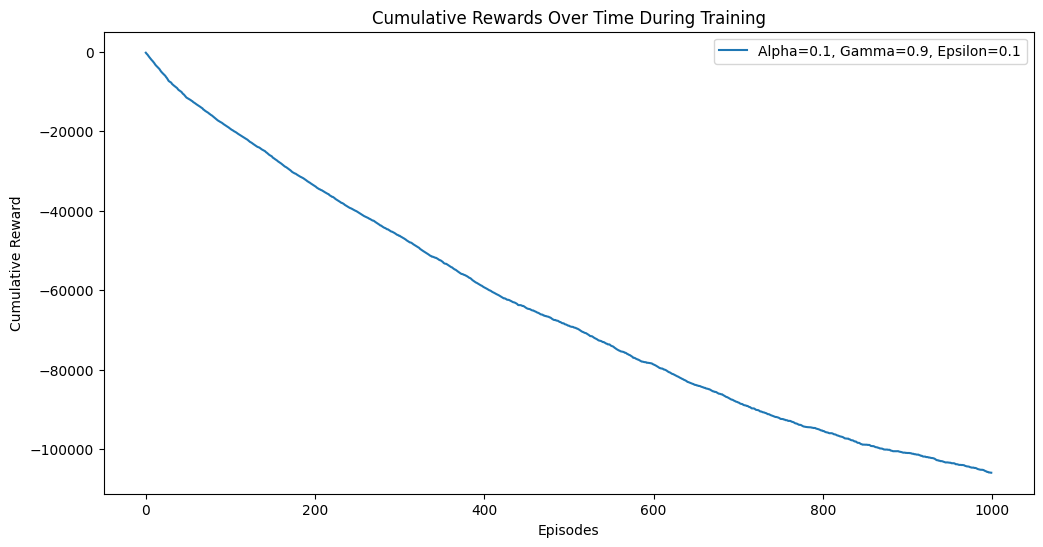

In [56]:
# Train the agent and track cumulative rewards
alpha = 0.1
gamma = 0.9
epsilon = 0.1

cumulative_rewards = train_agent(alpha, gamma, epsilon)

# Plot the cumulative rewards over time
plt.figure(figsize=(12, 6))
plt.plot(range(episodes), cumulative_rewards, label=f'Alpha={alpha}, Gamma={gamma}, Epsilon={epsilon}')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards Over Time During Training')
plt.legend()
plt.show()

Visualize the grid and how the taxi moves within it.

In [1]:
import gym

# Create the Taxi environment and unwrap it to access the original Taxi environment
env = gym.make("Taxi-v3")
env = env.unwrapped  # Unwrap the environment to access the original 'Taxi-v3' environment

# Define a function to visualize the current state of the grid
def render_taxi_grid(state):
    # Decode the state into (taxi_row, taxi_col, passenger_location, destination_location)
    taxi_row, taxi_col, passenger_location, destination_location = env.decode(state)
    
    # Create a 5x5 grid of empty spaces
    grid = [[' ' for _ in range(5)] for _ in range(5)]
    
    # Mark the taxi's position
    grid[taxi_row][taxi_col] = 'T'
    
    # Mark the passenger's position (P) based on passenger location
    if passenger_location == 0:  # 0 represents the passenger in the lower-left corner
        grid[0][0] = 'P'
    elif passenger_location == 1:  # 1 represents the passenger in the lower-right corner
        grid[0][4] = 'P'
    elif passenger_location == 2:  # 2 represents the passenger in the upper-left corner
        grid[4][0] = 'P'
    elif passenger_location == 3:  # 3 represents the passenger in the upper-right corner
        grid[4][4] = 'P'
    
    # Mark the destination (D) based on destination location
    if destination_location == 0:  # 0 represents the lower-left corner
        grid[0][0] = 'D'
    elif destination_location == 1:  # 1 represents the lower-right corner
        grid[0][4] = 'D'
    elif destination_location == 2:  # 2 represents the upper-left corner
        grid[4][0] = 'D'
    elif destination_location == 3:  # 3 represents the upper-right corner
        grid[4][4] = 'D'
    
    # Print the grid
    print("\nCurrent Taxi Grid:")
    for row in grid:
        print(" ".join(row))
    print("\n")

# Reset the environment to start from the initial state (encoded state)
state, info = env.reset()  # We now get a tuple: (state, info)

# Render the initial grid
render_taxi_grid(state)  # Only pass the state (encoded integer)

# Run a simple loop where the taxi takes random actions for 10 steps
for step in range(10):
    action = env.action_space.sample()  # Sample a random action
    state, reward, done, _, _ = env.step(action)  # Perform the action (returns new state)
    
    # Render the grid after the action
    render_taxi_grid(state)
    
    if done:
        print(f"Episode finished after {step + 1} steps")
        break



Current Taxi Grid:
D       P
         
         
    T    
         



Current Taxi Grid:
D       P
         
         
  T      
         



Current Taxi Grid:
D       P
         
         
  T      
         



Current Taxi Grid:
D       P
         
         
  T      
         



Current Taxi Grid:
D       P
         
  T      
         
         



Current Taxi Grid:
D       P
  T      
         
         
         



Current Taxi Grid:
D       P
         
  T      
         
         



Current Taxi Grid:
D       P
         
  T      
         
         



Current Taxi Grid:
D       P
         
    T    
         
         



Current Taxi Grid:
D       P
         
    T    
         
         



Current Taxi Grid:
D       P
         
         
    T    
         




Compare the performance with a random policy and a heuristic-based policy. 

1. Random Policy:
The agent chooses actions randomly from the available action space.

2. Heuristic-based Policy:
This policy uses a simple heuristic to make decisions. 

Implementing Random Policy

In [6]:
def random_policy(env):
    state, info = env.reset()  # Reset environment (for gymnasium v0.26+)
    done = False
    total_reward = 0
    while not done:
        action = env.action_space.sample()  # Randomly select an action
        next_state, reward, done, truncated, info = env.step(action)
        total_reward += reward
        state = next_state
    return total_reward

Step 2: Implementing Heuristic-based Policy

In [8]:
def heuristic_policy(env):
    state, info = env.reset()  # Reset environment (for gymnasium v0.26+)
    done = False
    total_reward = 0
    
    while not done:
        # Decode the current state (state is an integer, so decode it into a more readable format)
        taxi_pos, passenger_pos, destination_pos, is_picked_up = env.unwrapped.decode(state)

        # Calculate the Manhattan distance to the pickup and dropoff points
        if is_picked_up:
            target = destination_pos  # Move towards the dropoff location
        else:
            target = passenger_pos  # Move towards the pickup location
        
        # Get the current position of the taxi
        taxi_row, taxi_col = taxi_pos // 5, taxi_pos % 5
        target_row, target_col = target // 5, target % 5

        # List all possible actions (assuming 6 directions in Taxi-v3)
        possible_actions = env.action_space.n
        best_action = None
        min_distance = float('inf')

        for action in range(possible_actions):
            next_state, reward, done, truncated, info = env.step(action)
            
            # Decode the next state into the taxi position (and other elements)
            next_taxi_pos, _, _, _ = env.unwrapped.decode(next_state)
            next_row, next_col = next_taxi_pos // 5, next_taxi_pos % 5
            distance = abs(next_row - target_row) + abs(next_col - target_col)
            if distance < min_distance:
                min_distance = distance
                best_action = action

        # Perform the best action
        next_state, reward, done, truncated, info = env.step(best_action)
        total_reward += reward
        state = next_state

    return total_reward

def evaluate_policy(policy, env, num_episodes=100):
    """
    Evaluate a policy by running it for a number of episodes.
    
    Args:
    - policy: A function that implements the policy to be evaluated.
    - env: The environment in which to evaluate the policy.
    - num_episodes: The number of episodes to run for evaluation.
    
    Returns:
    - A list of total rewards for each episode.
    """
    rewards = []
    for _ in range(num_episodes):
        total_reward = policy(env)
        rewards.append(total_reward)
    return rewards

 Comparing the Performance of the Three Policies, Plotting the Performance Comparison

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym


def compare_policies(env, num_episodes=5):
    # Get the performance for each policy
    random_rewards = evaluate_policy(random_policy, env, num_episodes)
    heuristic_rewards = evaluate_policy(heuristic_policy, env, num_episodes)
    
    # Calculate average rewards for each policy
    random_avg = np.mean(random_rewards)
    heuristic_avg = np.mean(heuristic_rewards)
    
    # Create a bar plot to compare the average rewards
    plt.figure(figsize=(10, 6))
    policies = ['Random Policy', 'Heuristic Policy']
    avg_rewards = [random_avg, heuristic_avg]
    
    plt.bar(policies, avg_rewards, color=['blue', 'green'])
    plt.title(f'Policy Comparison: Average Reward Over {num_episodes} Episodes')
    plt.xlabel('Policy')
    plt.ylabel('Average Reward')
    plt.show()

    # Print average rewards for each policy
    print(f'Average reward (Random Policy): {random_avg}')
    print(f'Average reward (Heuristic Policy): {heuristic_avg}')

# Run
env = gym.make('Taxi-v3')  # Replace with your environment if different
compare_policies(env, num_episodes=5)


KeyboardInterrupt: 

Train the RL agent on the Taxi-v3 environment.

Episode 0/1000, Total Reward: -271
Episode 100/1000, Total Reward: -118
Episode 200/1000, Total Reward: -18
Episode 300/1000, Total Reward: 9
Episode 400/1000, Total Reward: 3
Episode 500/1000, Total Reward: 5
Episode 600/1000, Total Reward: -5
Episode 700/1000, Total Reward: -13
Episode 800/1000, Total Reward: -2
Episode 900/1000, Total Reward: 6
Average reward over 10 episodes: 7.8


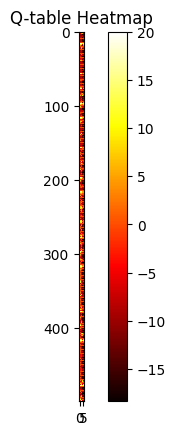

In [10]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Initialize the Taxi-v3 environment
env = gym.make('Taxi-v3')

# Initialize the Q-table with zeros (state x action)
# State space has 500 states, action space has 6 actions (0-5)
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
learning_rate = 0.8        # Alpha: How much new information overrides old information
discount_factor = 0.95     # Gamma: Discount factor for future rewards
epsilon = 0.1              # Epsilon: Probability of choosing a random action (exploration)
num_episodes = 1000        # Total number of training episodes
max_steps_per_episode = 100  # Max steps in an episode

# Function to choose an action based on epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore: choose a random action
    else:
        return np.argmax(Q[state])        # Exploit: choose the action with the highest Q-value

# Training loop
for episode in range(num_episodes):
    state, _ = env.reset()  # Reset the environment at the start of each episode
    done = False
    total_reward = 0

    for step in range(max_steps_per_episode):
        action = epsilon_greedy_policy(state, epsilon)
        next_state, reward, done, _, _ = env.step(action)  # Take the action and observe the result

        # Update the Q-table using the Q-learning update rule
        Q[state, action] = Q[state, action] + learning_rate * (reward + discount_factor * np.max(Q[next_state]) - Q[state, action])
        
        state = next_state
        total_reward += reward
        
        if done:
            break

    # Optional: Print episode info every 100th episode
    if episode % 100 == 0:
        print(f"Episode {episode}/{num_episodes}, Total Reward: {total_reward}")

# After training, evaluate the agent
def evaluate_agent(num_episodes=10):
    total_rewards = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        
        while not done:
            action = np.argmax(Q[state])  # Choose the best action based on Q-table (exploitation)
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
        
        total_rewards += total_reward
    
    avg_reward = total_rewards / num_episodes
    print(f"Average reward over {num_episodes} episodes: {avg_reward}")
    return avg_reward

# Evaluate the trained agent
evaluate_agent(10)

# Plot Q-table heatmap (Optional for visualization)
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Q-table Heatmap')
plt.show()
